In [1]:
from sklearn.model_selection import train_test_split

import sys
sys.path.append("../scripts")
from modeling import ModelingPipeline

In [2]:
# Initialize Pipeline
pipeline = ModelingPipeline()

In [3]:
# Load and preprocess data
data = pipeline.load_and_clean_data('../data/processed_data.csv')
data = pipeline.handle_missing_data(data)
data = pipeline.feature_engineering(data)
data = pipeline.process_dates(data)

In [4]:
# Encoding categorical data
categorical_columns_label = ['LegalType']
categorical_columns_onehot = ['Citizenship', 'Country', 'VehicleType']
data_encoded = pipeline.encode_data(data, columns_label=categorical_columns_label, columns_onehot=categorical_columns_onehot)

In [5]:
# Train-test split
X = data_encoded.drop(['TotalPremium', 'TotalClaims'], axis=1)
y = data_encoded['TotalPremium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scaling numerical columns
numeric_columns = ['RegistrationYear']
X_train, X_test = pipeline.scale_data(X_train, X_test, numeric_columns)

In [7]:
# Train models and evaluate
models = ['LinearRegression', 'RandomForest', 'XGBoost']
results = {}
for model_name in models:
    model = pipeline.train_model(model_name, X_train, y_train)
    y_pred = pipeline.predict_model(model, X_test)
    results[model_name] = pipeline.evaluate_model(y_test, y_pred)

Model LinearRegression trained in 6.39 seconds.
Model RandomForest trained in 616.43 seconds.
Model XGBoost trained in 17.84 seconds.


In [8]:
# Display results
pipeline.display_results(results)


Model Evaluation Metrics:

LinearRegression:
  MSE: 16053.7679
  MAE: 62.7851
  R2: 0.4181

RandomForest:
  MSE: 2192.1292
  MAE: 12.6428
  R2: 0.9205

XGBoost:
  MSE: 7408.2478
  MAE: 36.3824
  R2: 0.7315


Model RandomForest trained in 558.88 seconds.


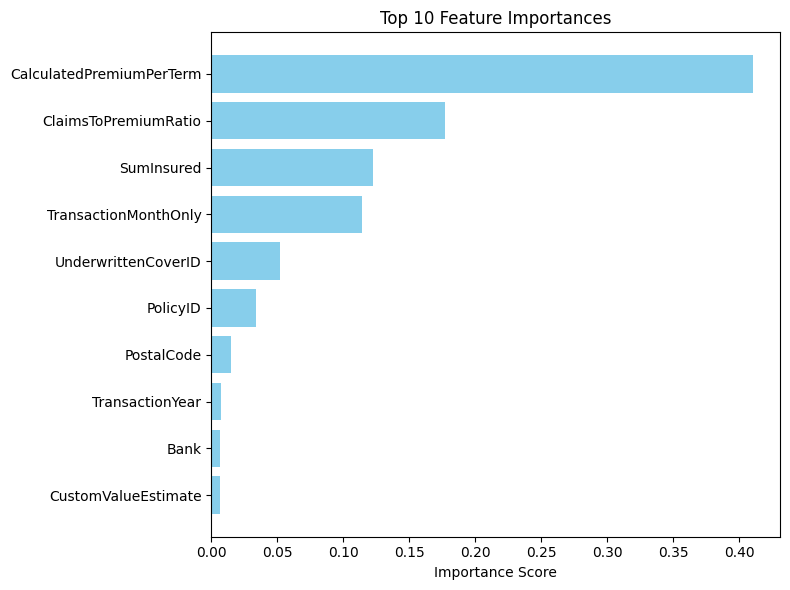

In [9]:
# Plot feature importance for Random Forest
rf_model = pipeline.train_model('RandomForest', X_train, y_train)
pipeline.plot_feature_importance(rf_model, X_train.columns, top_n=10)

In [11]:
# Save the Random Forest model
pipeline.save_model(rf_model, "../models/random_forest_model.joblib")

Model saved to ../models/random_forest_model.joblib.


In [13]:
import pickle

# Save the model using pickle
with open('../models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)